In [11]:
import matplotlib.pyplot as plt
import numpy as np
from traffic_model import TrafficModel

In [12]:
# Function to visualize the simulation in "bars"
def visualize_traffic_bars(model, steps):
    # Run the simulation for the specified number of steps
    for i in range(steps):
        print("Step:", i + 1)
        model.step()

        # Initialize a 2D numpy array representing the road with zeros
        road = np.zeros((1, model.grid.width), dtype=int)

        # Update the road array with the speed of each agent at their respective positions
        for agent in model.schedule.agents:
            road[0, agent.pos[0]] = agent.speed + 1

        # Create a matplotlib figure with a specific size
        plt.figure(figsize=(20, 1))
        # Display the road array as an image with the viridis colormap
        # Set vmin and vmax to scale the colors according to the maximum speed of the agents
        plt.imshow(road, cmap='viridis', vmin=0, vmax=model.schedule.agents[0].max_speed + 1)
        # Customize the plot's x and y ticks to remove labels and only show gridlines
        plt.xticks(np.arange(-0.5, model.grid.width - 0.5, 1), [])
        plt.yticks([], [])
        # Add gridlines to the plot with specific linestyle, linewidth, and color
        plt.grid(True, linestyle='-', linewidth=1, color='black')
        # Show the plot
        plt.show()


# Function to visualize the simulation and show its average speed
def visualize_traffic_avg_speed(model, steps):
    # Initialize a list to store average speeds at each step
    average_speeds = []

    # Run the simulation for the specified number of steps
    for _ in range(steps):
        model.step()  # Execute one step of the model
        avg_speed = model.calculate_average_speed()  # Calculate the average speed of vehicles
        average_speeds.append(avg_speed)  # Append the average speed to the list

    # Plot the average speeds over time
    plt.plot(average_speeds)
    # Label x-axis as 'Step'
    plt.xlabel('Step')
    # Label y-axis as 'Average Speed'
    plt.ylabel('Average Speed')
    # Set plot title
    plt.title('Avg Speed of Traffic Flow') \
    # Display the plot
    plt.show()

# Visualization "Bars"
The visualization uses the 'viridis' colormap, which is a perceptually uniform color scale that ranges from dark blue to yellow. In this simulation, the colors have the following meanings:

`Dark Blue`: This color represents an empty cell on the grid, meaning there is no vehicle present in that position.
`Light Blue to Green`: These colors represent vehicles with slower speeds. As the colors transition from light blue to green, it indicates an increase in the vehicle's speed, but still at the lower end of the speed range.
`Green to Yellow`: These colors represent vehicles with faster speeds. The transition from green to yellow indicates an increase in the vehicle's speed towards its maximum speed.

In the visualization, the color intensity increases as the vehicle's speed increases, with yellow representing the maximum speed a vehicle can achieve. By observing the colors, you can easily discern the traffic flow, areas of congestion, and the impact of the inertial vehicle on the overall traffic pattern.

In [13]:
# Define simulation parameters
road_length = 100            # Length of the one-lane road
vehicle_count = 20           # Total number of vehicles in the simulation
max_speed = 5                # Maximum speed of vehicles
slowdown_probability = 0.5   # Probability of a vehicle randomly slowing down
slow_vehicle_count = 5       # Number of slow-moving vehicles
slow_vehicle_max_speed = 3   # Maximum speed of slow-moving vehicles
model_steps = 10             # Number of simulation steps

model_viz_bars = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability, slow_vehicle_count, slow_vehicle_max_speed)

Step: 1


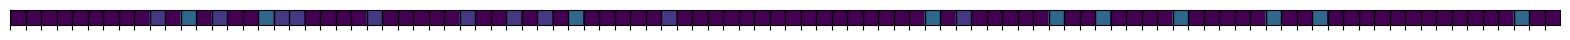

Step: 2


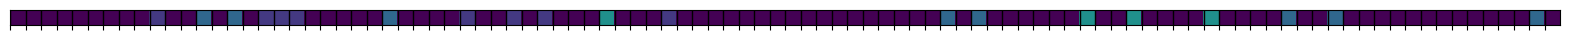

Step: 3


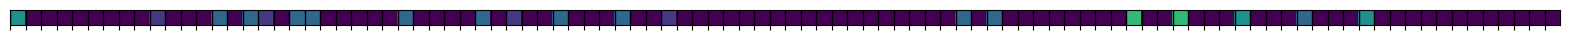

Step: 4


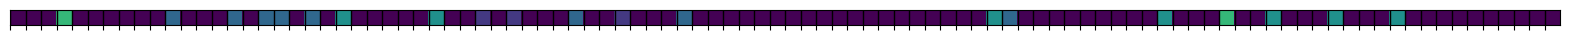

Step: 5


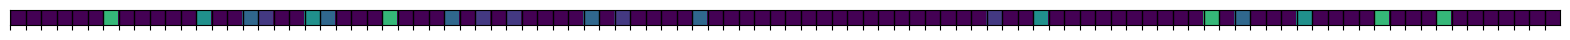

Step: 6


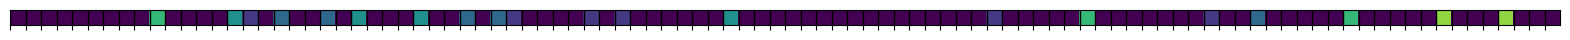

Step: 7


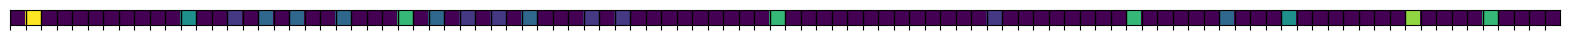

Step: 8


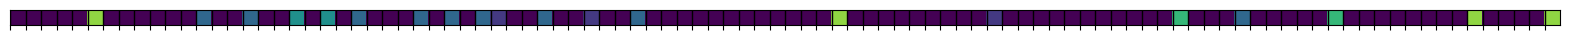

Step: 9


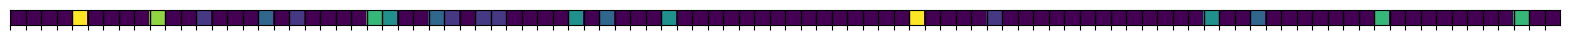

Step: 10


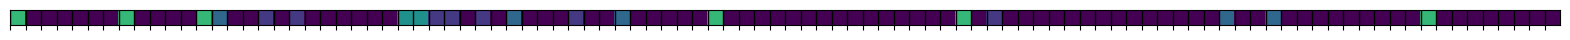

In [14]:
visualize_traffic_bars(model_viz_bars, model_steps)

# Visualization "Average"
This graph visualizes the impact of slow-moving vehicles on the traffic flow in a one-lane road simulation.
calculates speed of all vehicles in the simulation. This is done by computing the sum of speeds of all agents (vehicles) in the schedule and divides it by the total number of agents. The result is the average speed
After running the simulation, the code plots the average speeds over time using a line plot, with the x-axis representing the simulation step and the y-axis representing the average speed.

In [15]:
# Define simulation parameters
road_length = 1000            # Length of the one-lane road
vehicle_count = 100           # Total number of vehicles in the simulation
max_speed = 10                # Maximum speed of vehicles
slowdown_probability = 0.5    # Probability of a vehicle randomly slowing down
slow_vehicle_count = 1        # Number of slow-moving vehicles
slow_vehicle_max_speed = 5    # Maximum speed of slow-moving vehicles
model_steps = 100             # Number of simulation steps

model_viz_avg_speed = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability, slow_vehicle_count, slow_vehicle_max_speed)

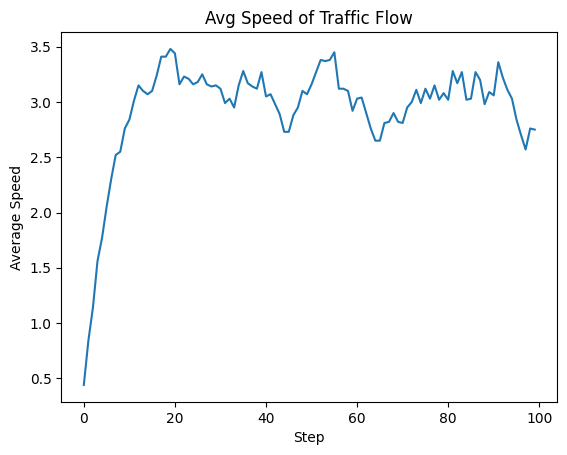

In [16]:
visualize_traffic_avg_speed(model_viz_avg_speed, model_steps)

# Visualization "Average, with events"
Same premise as above, but now offers the ability to add events at specific time(step) or or every certain number of steps

In [17]:
def slow_down_all_vehicles(model):
    for agent in model.schedule.agents:
        agent.speed = max(agent.speed - 1, 0)

occurrence_step = 1            # Initial step an event occurs at
repeat_occurrence_steps = 10   # Every certain number of steps an event occurs at

model_viz_avg_speed.add_event(occurrence_step, slow_down_all_vehicles, repeat_occurrence_steps, model_viz_avg_speed)

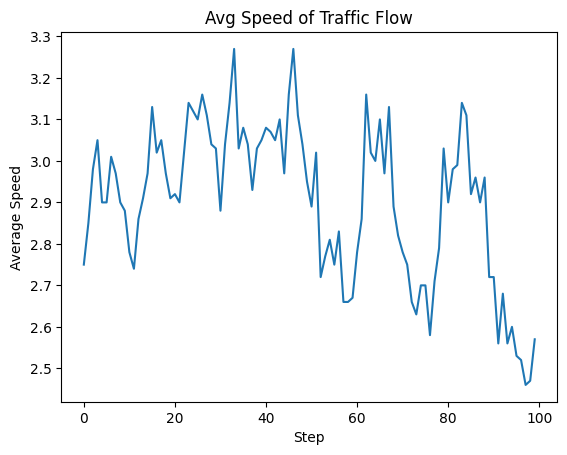

In [18]:
visualize_traffic_avg_speed(model_viz_avg_speed, model_steps)

In [19]:
def impact_slow_vehicles(titel, steps, model_with_slow, model_without_slow):
    # Runs both models for the specified number of steps, calculates the average speed of vehicles at each step, and then plots the average speeds for both scenarios to visually compare their impact on traffic flow.
    average_speeds = []

    # Run the simulation for the specified number of steps
    for _ in range(steps):
        # Execute one step of the model
        model_with_slow.step()
        # Calculate the average speed of vehicles
        avg_speed = model_with_slow.calculate_average_speed()
        # Append the average speed to the list
        average_speeds.append(avg_speed)


    # Initialize a list to store average speeds at each step
    average_speeds_no_slow_vehicle = []

    # Run the simulation for the specified number of steps
    for _ in range(steps):
        # Execute one step of the model
        model_without_slow.step()
        # Calculate the average speed of vehicles
        avg_speed = model_without_slow.calculate_average_speed()
        # Append the average speed to the list
        average_speeds_no_slow_vehicle.append(avg_speed)

    # Plot the average speeds with slow-moving vehicles
    plt.plot(average_speeds, label='With slow-moving vehicle')
    # Plot the average speeds without slow-moving vehicles
    plt.plot(average_speeds_no_slow_vehicle, label='Without slow-moving vehicle')
    # Label x-axis as 'Step'
    plt.xlabel('Step')
    # Label y-axis as 'Average Speed'
    plt.ylabel('Average Speed')
    # Set plot title
    plt.title(f'{titel}')
    # Display the legend
    plt.legend()
    # Display the plot
    plt.show()


# Visualization impact of slow vehicles
These graphs visualize the impact slow vehicles have on the traffic flow, this is done by getting the average speed at every step, for both models (with and without slow vehicles) and then plotting them.

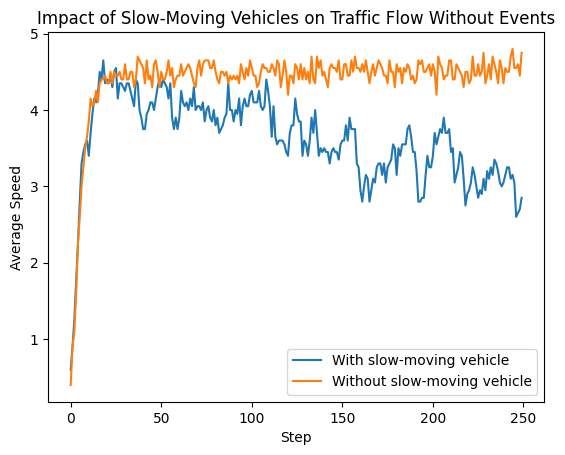

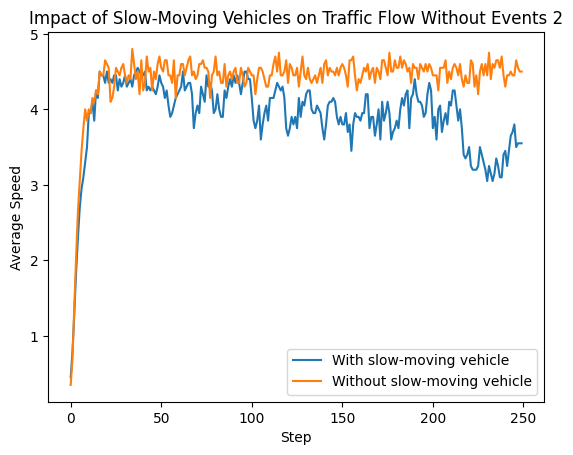

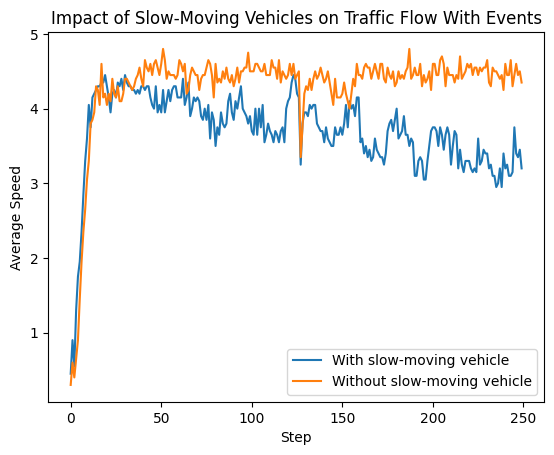

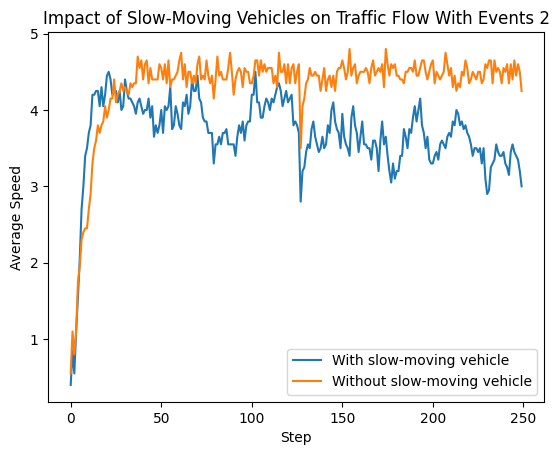

In [21]:
# Define simulation parameters
road_length = 1000            # Length of the one-lane road
vehicle_count = 20            # Total number of vehicles in the simulation
max_speed = 5                 # Maximum speed of vehicles
slowdown_probability = 0.5    # Probability of a vehicle randomly slowing down
slow_vehicle_count = 1        # Number of slow-moving vehicles
slow_vehicle_max_speed = 2.5  # Maximum speed of slow-moving vehicles
model_steps = 250             # Number of simulation steps
occurrence_step = 2           # Initial step an event occurs at
repeat_occurrence_steps = 125 # Every certain number of steps an event occurs at


# Note the models are getting reinitialized before every visualization, the reason for this is that the models retain their states from the previous run. When you reinitialize the models, they start fresh with their initial conditions. However, when you don't reinitialize them and directly visualize them, they continue from the state they were in at the end of the previous run.
model_slow_vehicles = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability, slow_vehicle_count, slow_vehicle_max_speed)
model_no_slow_vehicles = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability)
impact_slow_vehicles('Impact of Slow-Moving Vehicles on Traffic Flow Without Events', model_steps, model_slow_vehicles, model_no_slow_vehicles)

model_slow_vehicles = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability, slow_vehicle_count, slow_vehicle_max_speed)
model_no_slow_vehicles = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability)
impact_slow_vehicles('Impact of Slow-Moving Vehicles on Traffic Flow Without Events 2', model_steps, model_slow_vehicles, model_no_slow_vehicles)



model_slow_vehicles = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability, slow_vehicle_count, slow_vehicle_max_speed)
model_no_slow_vehicles = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability)
model_slow_vehicles.add_event(occurrence_step, slow_down_all_vehicles, repeat_occurrence_steps, model_slow_vehicles)
model_no_slow_vehicles.add_event(occurrence_step, slow_down_all_vehicles, repeat_occurrence_steps, model_no_slow_vehicles)
impact_slow_vehicles('Impact of Slow-Moving Vehicles on Traffic Flow With Events', model_steps, model_slow_vehicles, model_no_slow_vehicles)


model_slow_vehicles = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability, slow_vehicle_count, slow_vehicle_max_speed)
model_no_slow_vehicles = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability)
model_slow_vehicles.add_event(occurrence_step, slow_down_all_vehicles, repeat_occurrence_steps, model_slow_vehicles)
model_no_slow_vehicles.add_event(occurrence_step, slow_down_all_vehicles, repeat_occurrence_steps, model_no_slow_vehicles)
impact_slow_vehicles('Impact of Slow-Moving Vehicles on Traffic Flow With Events 2', model_steps, model_slow_vehicles, model_no_slow_vehicles)